# Unsupervised Learning

The method of extracting the patterns inferred from the unlabelled dataset.   #Clustering: A way of grouping the data in to diff clusters, consisting of similar data points #Association Rule: This rule checks the dependency of one data item over another item and maps accordingly so that it is profitable

# K Means Clustering

In [ ]:
# Choose the number k - predefint the number of clusters
# Choose random k data points or centroids (can be from the input dataset)
# Assign each data points to its closest centroid. We draw a median line between these centroids so that this line distinguishes the data points
# Now re-compute the centroid of each cluster and reassign the centroid to its new value of the centroid
# Repeat the steps above to attain a optimal centroid - no change in value of centroid after re-computation
# Remove the centroids if there are assumed rather than a picking a random data point as centroid from the input dataset

# The optimal value of predefined clusters are determined using Elbow method (It involves the k means clustering algorithm)

# Run the k means clustering algo for each k value until each points becomes the centroid itself
# Computer WCSS - within cluster sum of squares
# We compute the wcss for every different setup of clusters k then decide the optimal k by visualization
# plot graph with k vs wcss 
# choose the intial point with steep decrease of wcss which acts like elbow


# K-means++ method is used to combat the Random Initialization trap
# -> Select first random point as a centroid from the dataset 
# -> Now, compute the distance(D) from each remaining points to the nearest centrod out of already selected centroids
# -> Assign the new centroid with the weighted distance(D^2) from the earlier nearest centroid
# -> Repeat the above steps untill k centroids ahave been selected
# -> Proceed with k means clustering 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dataset=pd.read_csv("Mall_Customers.csv")
x=dataset.iloc[:, [3,4]].values

# using elbow to determine the number of optimal clusters
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42) # n_init='auto' means number of times k means algo has to execute is 10 times else if init=k-means++ is 1 time
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

# now plot the data so that we can identify the optimal value
plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title('The Elbow Method')
plt.show()


In [ ]:
# The optimal number of clusters are found to be 5
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(x)
np.unique(y_kmeans)
kmeans.predict([[15,39]])

Visualization

In [ ]:
from matplotlib.colors import ListedColormap
for i,j in enumerate(np.unique(y_kmeans)):
  plt.scatter(x[y_kmeans==j,0], x[y_kmeans==j, 1], c=ListedColormap(('red','blue','green','cyan','magenta'))(i),s=100, label='cluster {}'.format(j+1))

# calculate cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

# Hierarchial Clustering

In [ ]:
# Same as KMeans clustering but the process is diff
# It is of two types: 1. Aggolmerative - Bottom up approach 2. Divisive - Top down approach
# Make each data point a single cluster - N clusters
# Take two closest clusters and make them single cluster - N-1 clusters
# Repeat above step until there is only one cluster
# Optimal number of clusters is found using dendrograms
# Dendrogram acts as a memory of the algorithm which remembers every step
# Dendrogram is a graph between data points and Euclidean distance for the clusters formed using the hierarchical clustering process
# Heights determine the distance between the clusters formed iteratively with the closest first which also represents the dissimilarity between them
# In dendrogram, the largest/ highest distance that doesn't cross any horizontal line 
# largest vertical move that we can make without crossing any horizontal line

# Dendrograms are based on Within-Cluster-Variance
# Hierarchical clustering method is not appropriate for large datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

dataset=pd.read_csv("Mall_Customers.csv")
x=dataset.iloc[:, [3,4]].values

Finding the optimal number of clusters using dendrograms


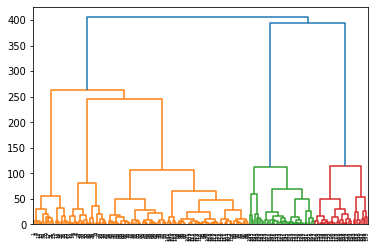

In [ ]:
# scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x, method='ward')) # 'ward' is the method applied in hierarchical cluster analysis - to minimise the variance in the clusters


From the above, the optimal number of clusters is 5 - 
The largest vertical move without crossing any horizontal line

In [ ]:
# Now fitting the model with our dataset
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

visualization

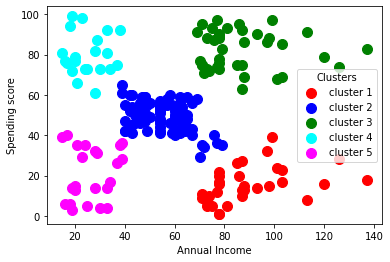

In [ ]:
import warnings
from matplotlib.colors import ListedColormap
warnings.filterwarnings('ignore')
for i,j in enumerate(np.unique(y_hc)):
  plt.scatter(x[y_hc==j,0], x[y_hc==j, 1], c=ListedColormap(('red','blue','green','cyan','magenta'))(i),s=100, label='cluster {}'.format(j+1))

plt.legend(title='Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

# Association rule Learning

Apriori

In [1]:
# Assocation rule learning is done using two algo's
# apriori, eclat
# Apriori - Uses the prior knowledge
# Support(m) = no of users watching m/total no of users
# confidence(m1->m2) = no of users watching m1 & m2/ no of users watching m1
# lift(m1->m2)= confidence(m1->m2)/support(m2)

# algo
# set a min support
# select all the subsets with support greater than the min support
# select all the rules with confidence grater than the min confidence
# sort the rules by decreasing lifts

!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=46f6beadf0be2594daa37080380b71f5c26f8ca5aa5db3347976274c35341118
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

dataset=pd.read_csv("Market_Basket_Optimisation.csv", header=None)

# apriori method expects a list
transactions=[]

for i in range(len(dataset)):
  transactions.append([str(dataset.values[i,j]) for j in range(len(dataset.columns)) if str(dataset.values[i,j])!=str(np.nan)])

rules=apriori(transactions=transactions, min_support=0.003, min_confidence=0.3, min_lift=3, min_length=2, max_length=2 )
results=list(rules)
results

[RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'tomato sauce', 'ground beef'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'groun

In [3]:
def inspect(results):
  lhs=[tuple(result[2][0][0])[0] for result in results]
  rhs=[tuple(result[2][0][1])[0] for result in results]
  supports=[result[1] for result in results]
  confidences=[result[2][0][2] for result in results]
  lifts=[result[2][0][3] for result in results]
  return list(zip(lhs, rhs, supports, confidences, lifts))

result_df=pd.DataFrame(inspect(results), columns=['lhs','rhs', 'support', 'confidence', 'lift'])
# decreasing order by lift
result_df.nlargest(n=10, columns=['lift'])

,lhs,rhs,support,confidence,lift
1,pasta,escalope,0.005866,0.372881,4.700812
4,pasta,shrimp,0.005066,0.322034,4.506672
3,tomato sauce,ground beef,0.005333,0.377358,3.840659
0,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,herb & pepper,ground beef,0.015998,0.323450,3.291994


Eclat is similar to apriori, In fact we model the data using apriori method only.
Eclat algo doesn't return any potential rules like apriori, it deals with all the subsets with support greater than min support

In [4]:
def inspect(results):
  lhs=[tuple(result[2][0][0])[0] for result in results]
  rhs=[tuple(result[2][0][1])[0] for result in results]
  supports=[result[1] for result in results]
  
  return list(zip(lhs, rhs, supports))

result_df=pd.DataFrame(inspect(results), columns=['lhs','rhs', 'support'])
# decreasing order by lift
result_df.nlargest(n=10, columns=['support'])

,lhs,rhs,support
2,herb & pepper,ground beef,0.015998
1,pasta,escalope,0.005866
0,mushroom cream sauce,escalope,0.005733
3,tomato sauce,ground beef,0.005333
4,pasta,shrimp,0.005066
